In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)


In [2]:
import numpy as np

# Specify the path to your text file
file_path = 'world_big.txt'

# Read the text file into a NumPy array
world = np.loadtxt(file_path)

world = np.flip(world, 0)

# Get the size of the array
num_rows, num_cols = world.shape

# Define starting positions and ending positions
starting_positions = [(5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]  # Example starting positions
ending_positions = [(31, 21), (32, 21), (33, 21), (34, 21), (35, 21), (36, 21),
                    (30, 22), (31, 22), (32, 22), (33, 22), (34, 22), (35, 22), (36, 22), (37, 22),
                    (30, 23), (31, 23), (32, 23), (33, 23), (34, 23), (35, 23), (36, 23), (37, 23),
                    (30, 24), (31, 24), (32, 24), (33, 24), (34, 24), (35, 24), (36, 24), (37, 24),
                    (30, 25), (31, 25), (32, 25), (33, 25), (34, 25), (35, 25), (36, 25), (37, 25),
                    (30, 26), (31, 26), (32, 26), (33, 26), (34, 26), (35, 26), (36, 26), (37, 26)]

In [3]:
# Create a plot with cell borders
def show_world(world, starting_positions, ending_positions, starting_pos=(0,0), Q=[0]):
    world_int = np.flip(world, 0)
    fig, ax = plt.subplots(figsize=(100, 100))
    ax.imshow(world_int, cmap='gray', interpolation='none', extent=[0, num_cols, 0, num_rows], vmin=0, vmax=1)

    # Plot starting positions in red
    for position in starting_positions:
        ax.scatter(position[1] + 0.5, position[0] + 0.5, color='red', marker='s', s=150)

    # Plot ending positions in green
    for position in ending_positions:
        ax.scatter(position[1] + 0.5, position[0] + 0.5, color='green', marker='s', s=150)

    # Add borders to each cell
    for i in range(num_rows + 1):
        ax.axhline(i, color='black', linewidth=1)

    for i in range(num_cols + 1):
        ax.axvline(i, color='black', linewidth=1)    

    # Highlight zeros in light grey
    for i in range(num_rows):
        for j in range(num_cols):
            if world_int[i, j] == 0:
                rect = plt.Rectangle((j, 41-i), 1, 1, facecolor='grey', edgecolor='lightgrey')
                ax.add_patch(rect)
                
    if Q is not [0]:
        for i in range(num_rows):
            for j in range(num_cols):
                x = j;
                y = 41-i
                for i in range(3):
                    ax.text(x, y+i/3, "{:2.2f}".format(Q[i][j][i*3]))
                    ax.text(x+0.333, y+i/3, "{:2.2f}".format(Q[i][j][i*3+1]))
                    ax.text(x+0.666, y+i/3, "{:2.2f}".format(Q[i][j][i*3+2]))

    if(starting_pos != (0,0)):
        ax.scatter(starting_pos[1] + 0.5, starting_pos[0] + 0.5, color='blue', marker='o', s=150)

    ax.set_title('Racetrack with Starting and Ending Positions')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Rows')
    ax.set_xticks(np.arange(0.5, num_cols, 1))
    ax.set_yticks(np.arange(0.5, num_rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    plt.tight_layout()
    plt.savefig('world.pdf')  

    # Show the plot
    plt.show()

TypeError: 'int' object is not subscriptable

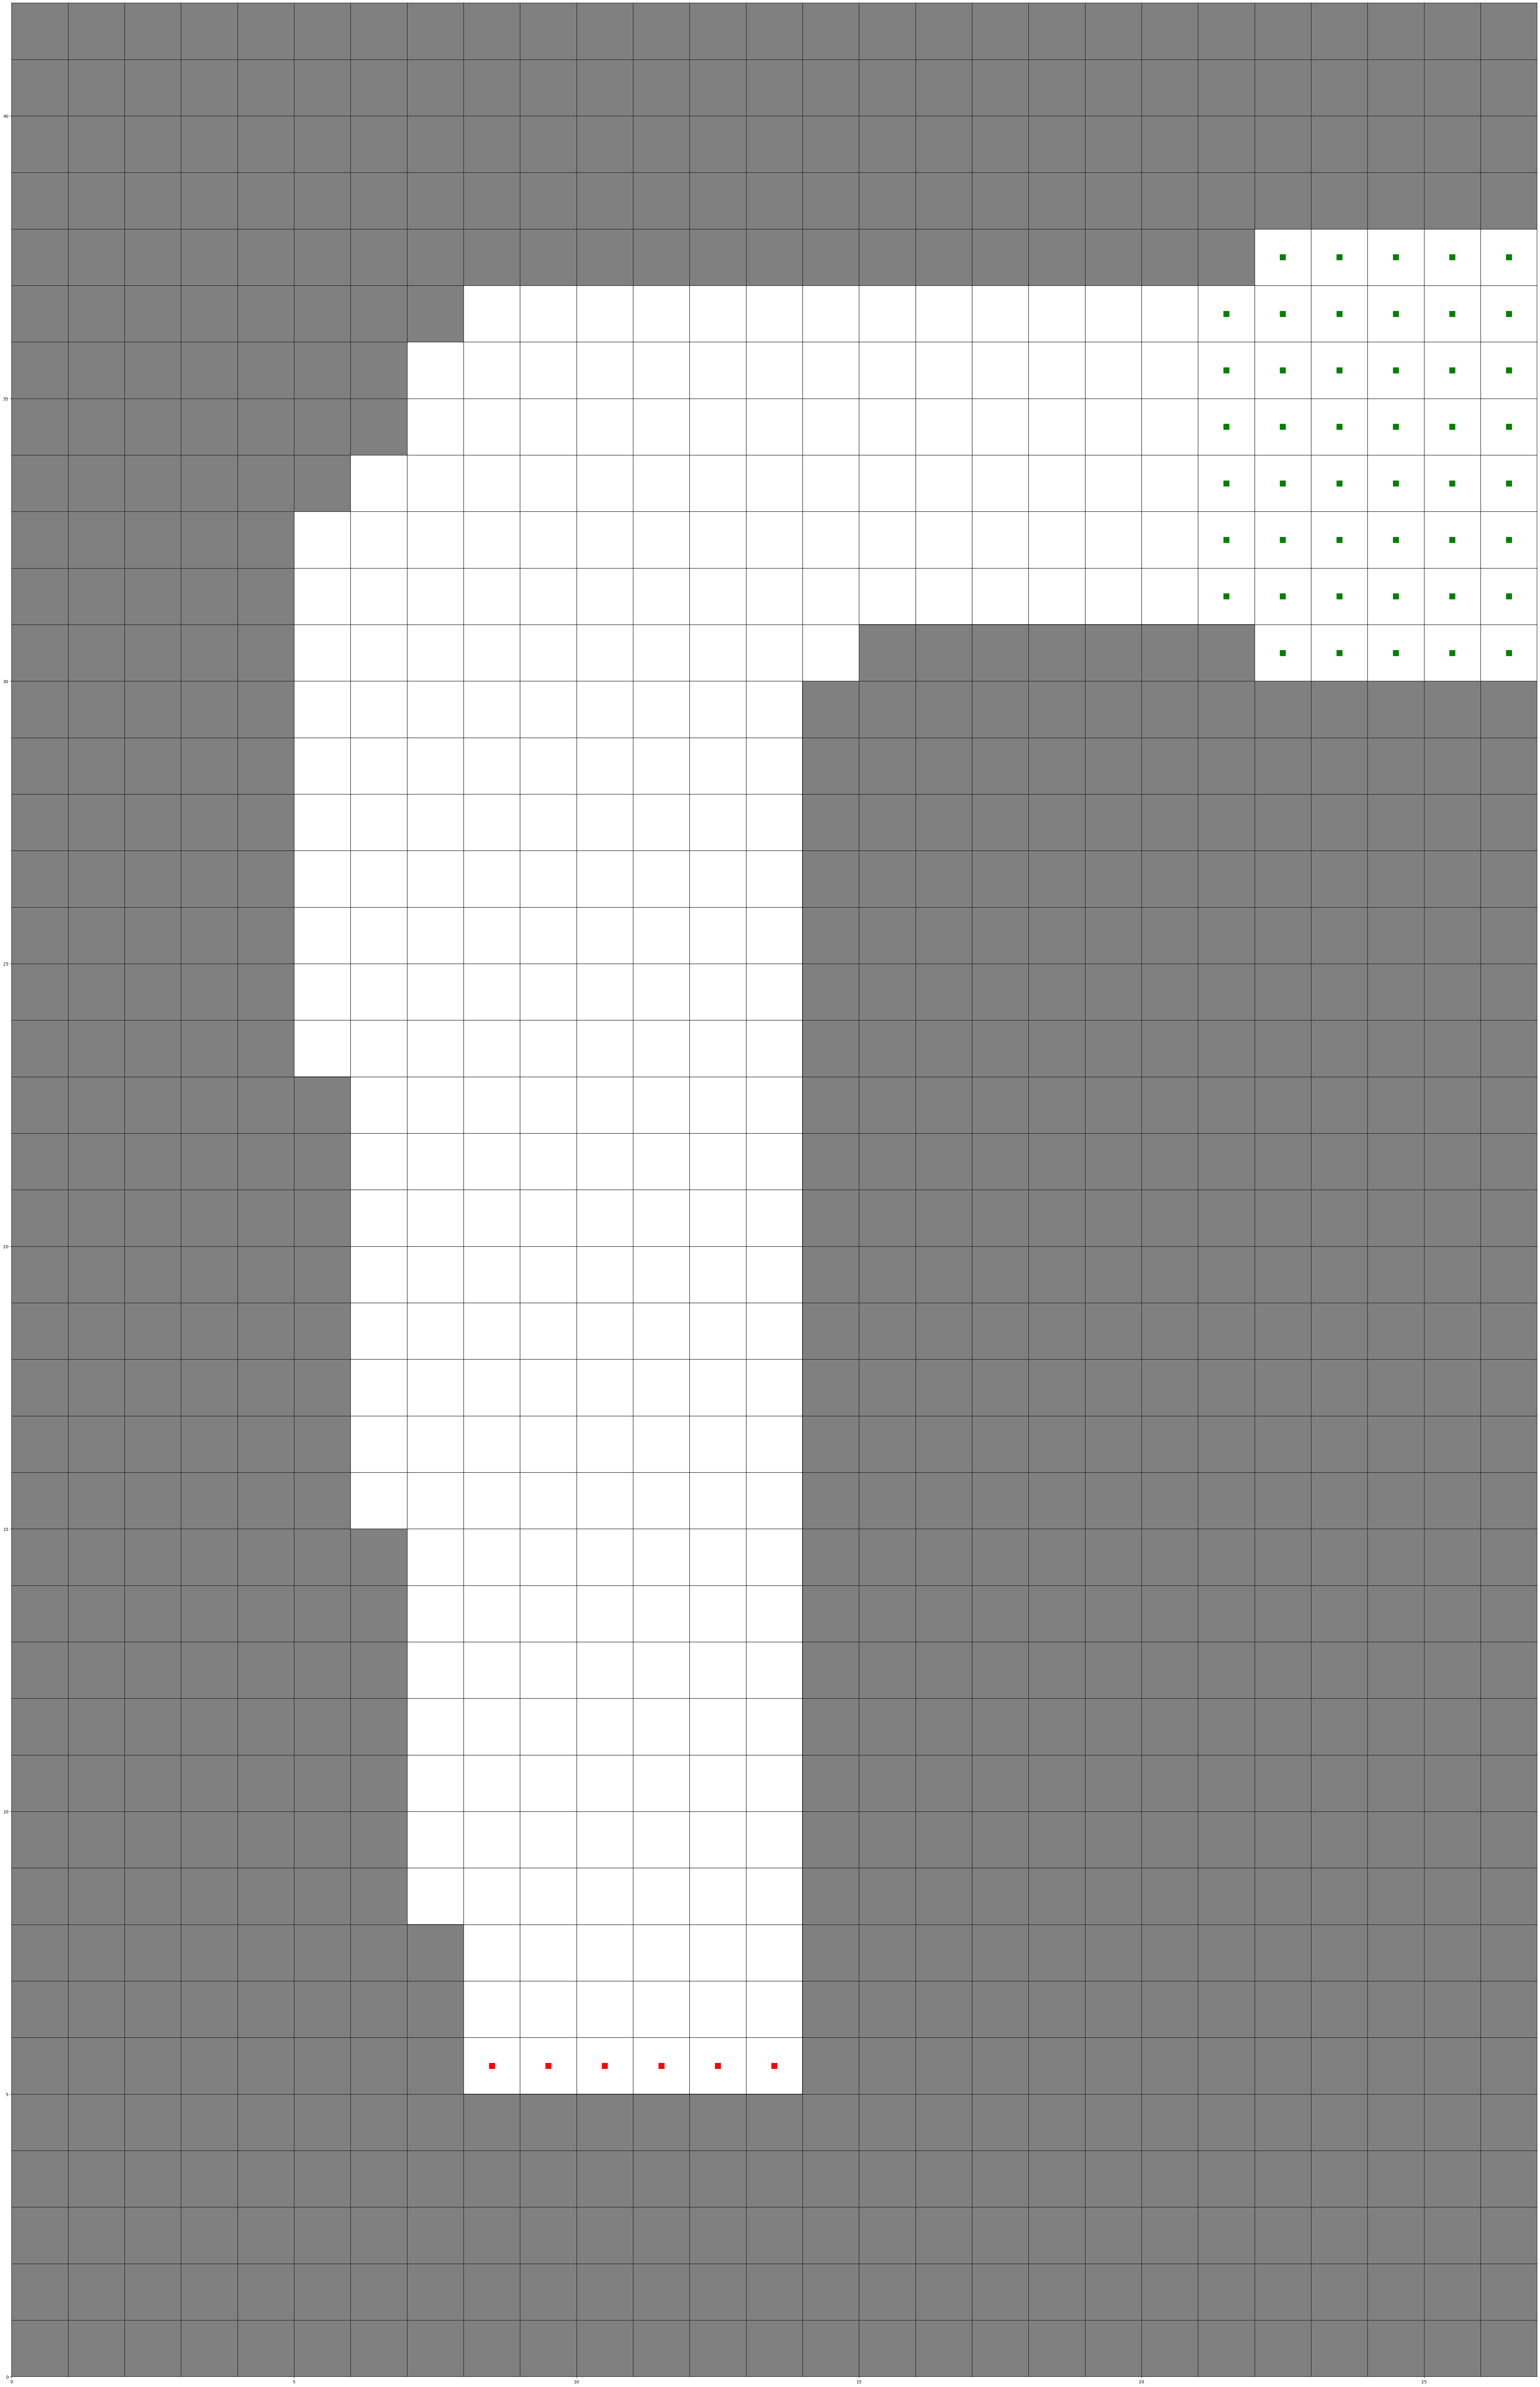

In [4]:
show_world(world, starting_positions, ending_positions)

In [5]:
actions_dict = {
  0: (-1,-1),
  1: (0,-1),
  2: (1,-1),
  3: (-1,0),
  4: (0,0),
  5: (1,0),
  6: (-1,1),
  7: (0,1),
  8: (1,1),
}
inv_actions_dict = {v: k for k, v in actions_dict.items()}

def limit_speed(speed: (int, int)):
    return (max(min(5, speed[0]), 0), max(min(5, speed[1]), 0))

def choose_starting_pos():
    return starting_positions[np.random.randint(len(starting_positions))]

def check_in_boundary(pos: (int, int)):
    if world[pos[0], pos[1]] == 1:
        return True
    return False

def check_win(pos: (int, int)):
    if (pos) in ending_positions:
        return True
    return False

def get_reward(pos: (int, int)):
    if check_win(pos) is True:
        return 0
    else:
        return -1

def calc_move(position: (int, int), delta: (int, int), action: (int, int)):
    new_delta = limit_speed((delta[0]+action[0], delta[1] + action[1]))
    new_position = (position[0]+new_delta[0], position[1]+new_delta[1])
    win = False
    if check_in_boundary(new_position) is False:
        new_position = choose_starting_pos()
        new_delta = (0, 0)
    if check_win(new_position) is True:
        #print('win')
        #print('new_position: ', new_position)
        win = True
    reward = get_reward(new_position)
    
    return new_position, new_delta, reward, win
    
def random_action():
    x = np.random.randint(9)
    return actions_dict[x]

In [6]:
def gen_episode():
    episode = []
    win = False
    current_delta = (0,0)
    current_pos = choose_starting_pos()
    #while win is False:
    while win is 2:    
        action = random_action()
        new_pos, new_delta, reward, win = calc_move(current_pos, current_delta, action)

        state_action_reward = ((current_pos, current_delta), action, reward)
        episode.append(state_action_reward)
        
        current_pos = new_pos
        current_delta = new_delta
        
        #print(state_action_reward)
        
    #show_world(world, starting_positions, ending_positions, current_pos)
    return episode

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_12989/1501048843.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  while win is 2:
/tmp/ipykernel_12989/1501048843.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  while win is 2:


Q:  (42, 27, 9)
0


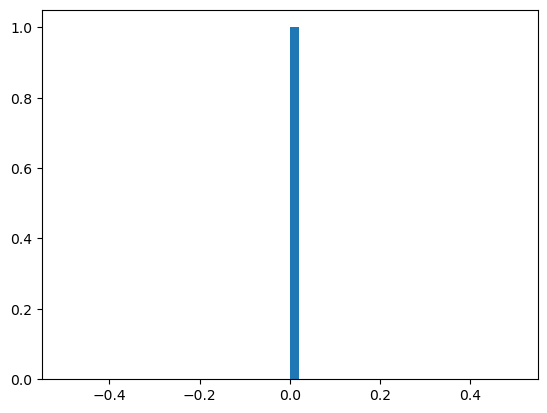

In [7]:
num_episodes = 1
total_actions = 9
Q = -np.random.rand(num_rows, num_cols, total_actions)
print('Q: ', Q.shape)


C = np.zeros((num_rows, num_cols, total_actions))
b = 1/total_actions
alpha = 1/10
gamma=0.99
epsilon = 0.1

print(len(gen_episode()))

episodes = []
lengths = []

for i in range(num_episodes):
    episode = gen_episode()
    lengths.append(len(episode))
    episodes.append(episode)
    
#print(episodes)
plt.hist(lengths,  bins=50)
plt.show()


In [8]:
print(f"Minimum steps: {min(lengths)}")
print(f"Maximum steps: {max(lengths)}")

Minimum steps: 0
Maximum steps: 0


# Sarsa

![Bildbeschreibung](sarsa_algo.png)


In [9]:
# Implementing the TD(0) (SARSA) algorithm based on the new pseudocode provided by the user.

def epsilon_greedy(Q, state, epsilon=0.1):
    if np.random.uniform(0, 1) < epsilon:
        # Explore: select a random action
        return random_action()
    else:
        # Exploit: select the best action based on current Q-values
        return actions_dict[np.argmax(Q[state[0][0]][state[0][1]])]

def sarsa(Q, num_episodes, alpha=0.1, gamma=1.0, epsilon=0.1):
    episode_lengths = []
    for episode in range(num_episodes):
        
        # Initialize the starting state S (choosing from the starting positions)
        current_pos = choose_starting_pos()
        #print('current_pos: ', current_pos)
        current_delta = (0, 0)  # Assuming starting delta is (0, 0)
        
        current_state = (current_pos, current_delta)
        #print('current_state: ', current_state)

        # Choose the first action A from S using Q (epsilon-greedy)
        current_action = epsilon_greedy(Q, current_state, epsilon)
        #print('current_action: ', current_action)


        # Loop for each step of the episode
        done = False
        i = 0
        
        while not done:
            # Take action A, observe R, S'            
            new_pos, new_delta, reward, done = calc_move(current_state[0], current_state[1], current_action)
            #print('new_pos, new_delta, reward, done: ', new_pos, new_delta, reward, done)
            
            new_state = (new_pos, new_delta) 
            #print('new_state', new_state)

            # Choose A' from S' using Q (epsilon-greedy)
            new_action = epsilon_greedy(Q, new_state, epsilon)
            #print('new_action', new_action)
            
            # Update the Q-value for the current state and action pair
            Q[current_state[0][0]][current_state[0][1]][inv_actions_dict[current_action]] += alpha * (reward + gamma * Q[new_state[0][0]][new_state[0][1]][inv_actions_dict[new_action]] - Q[current_state[0][0]][current_state[0][1]][inv_actions_dict[current_action]])
            #print('Q[current_state[0][0]][current_state[0][1]][inv_actions_dict[current_action]]: ', Q[current_state[0][0]][current_state[0][1]][inv_actions_dict[current_action]])
            
            
            # S <- S'; A <- A'
            current_state = new_state
            #print('current_state: ', current_state)
            current_action = new_action
            #print('current_action: ', current_action)
            
            i+=1
        
        episode_lengths.append(i)
    return Q, episode_lengths


average of the last 10000 steps: 176.471
last 10 episode lengths: [26, 85, 84, 35, 477, 12, 45, 347, 141, 35]


<function matplotlib.pyplot.show(close=None, block=None)>

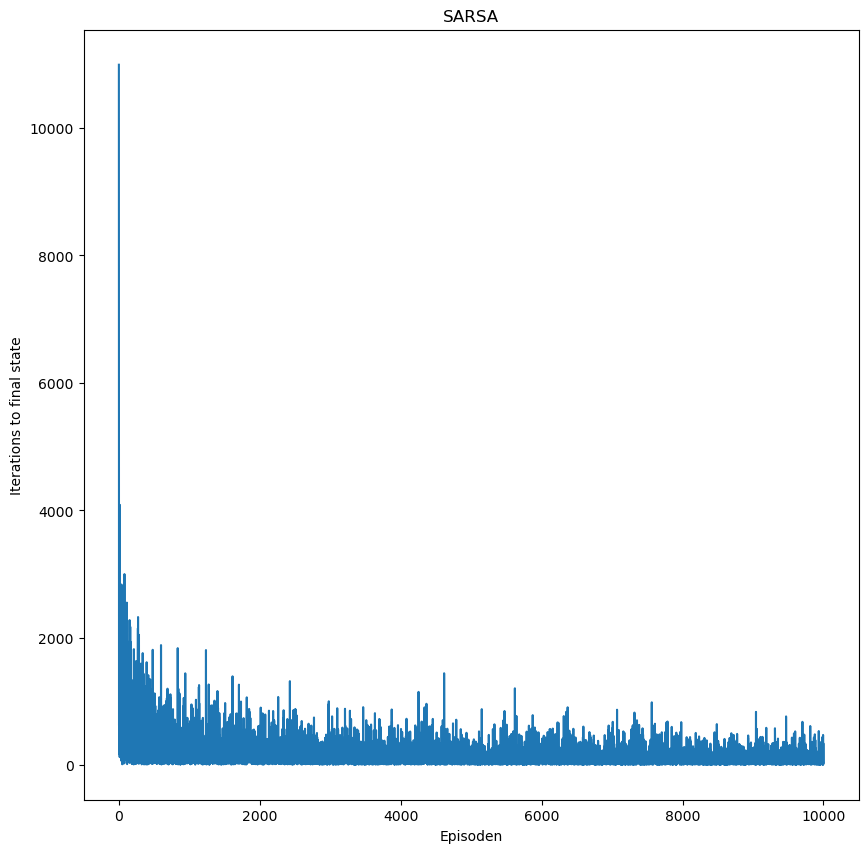

In [10]:
# init Q with negative values, when exploiting, choose action that yields the most
# init discount factor gamma with 0.99
# init step size alpha with 1/10 / 1/20
num_episodes = 10000
total_actions = 9
Q = -np.random.rand(num_rows, num_cols, total_actions)
for ending_pos in ending_positions:
    Q[ending_pos[0], ending_pos[1]] = [0,0,0,0,0,0,0,0,0]
#print(Q)
#b = 1/total_actions


alpha = 1/100
gamma=0.99
epsilon = 0.1
Q, episode_lengths=sarsa(Q, num_episodes, alpha, gamma, epsilon)


#print(episode_lengths)
#show_world(world, starting_positions, ending_positions, Q=Q)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(episode_lengths)
print(f"average of the last 10000 steps: {np.average(episode_lengths[-10000:len(episode_lengths)])}")
print(f"last 10 episode lengths: {episode_lengths[-10:len(episode_lengths)]}")
plt.show


plt.xlabel('Episoden')
plt.ylabel('Iterations to final state')

# Überschrift hinzufügen
plt.title('SARSA')

# Speichern der Grafik mit Überschrift
plt.savefig('Sarsa.png')

plt.show

# N-Step Sarsa

![Bildbeschreibung](n_step_sarsa_algo.png)


![Bildbeschreibung](n_step_sarsa_algo2.png)


In [11]:
# Implementing the TD(0) (SARSA) algorithm based on the new pseudocode provided by the user.

def epsilon_greedy(Q, state, epsilon=0.1):
    if np.random.uniform(0, 1) < epsilon:
        # Explore: select a random action
        return random_action()
    else:
        # Exploit: select the best action based on current Q-values
        return actions_dict[np.argmax(Q[state[0][0]][state[0][1]])]

def n_step_sarsa(Q, num_episodes, alpha=0.1, gamma=1.0, epsilon=0.1, n=5):
    episode_lengths = []    

    for episode in range(num_episodes):
                
        # Initialize the starting state S (choosing from the starting positions)
        current_pos = choose_starting_pos()
        #print('current_pos: ', current_pos)
        
        current_delta = (0, 0)  # Assuming starting delta is (0, 0)
        current_state = (current_pos, current_delta)
        #print('current_state: ', current_state)      
        

        # Choose the first action A from S using Q (epsilon-greedy)
        current_action = epsilon_greedy(Q, current_state, epsilon)
        #print('current_action: ', current_action)

        # Loop for each step of the episode
        done = False
        i = 0

        states=[]
        actions=[]        
        rewards=[]
        
        states.append(current_state)
        actions.append(current_action)

        G=0
        
        # runs until terminal state
        while not done:
        #for f in range(5):
            
            #print('######################################################################################')
            # Take action A, observe R, S'            
            new_pos, new_delta, reward, done = calc_move(current_state[0], current_state[1], current_action)
            #print('new_pos, new_delta, reward, done: ', new_pos, new_delta, reward, done)
            
            new_state = (new_pos, new_delta)  
            #print('new_state: ', new_state)

            # Choose A' from S' using Q (epsilon-greedy)
            new_action = epsilon_greedy(Q, new_state, epsilon)
            #print('new_action: ', new_action)
            
            rewards.append(reward)            
            #print('rewards: ', rewards)
            states.append(new_state)
            #print('states: ', states)
            actions.append(new_action)
            #print('actions: ',actions)
            
            if(len(rewards)==n):    
                #print('Enough Rewards time for update')
            
                # calculate n-step reward
                for rew in range(len(rewards)-1):
                    #print('rew: ', rew)
                    G += (gamma**rew)*rewards[rew]
                    #print('G: ', G)
                    
                # Update the Q-value for the current state and action pair
                
                #Q[current_state[0][0]][current_state[0][1]][inv_actions_dict[current_action]] += alpha * (G - gamma**n * Q[new_state[0][0]][new_state[0][1]][inv_actions_dict[new_action]] - Q[current_state[0][0]][current_state[0][1]][inv_actions_dict[current_action]])

                #print('G: ', G)
                #print('gamma**n: ', gamma**n)
                Q[states[0][0][0]][states[0][0][1]][inv_actions_dict[actions[0]]] += alpha * (G + gamma**n * Q[new_state[0][0]][new_state[0][1]][inv_actions_dict[new_action]] - Q[states[0][0][0]][states[0][0][1]][inv_actions_dict[actions[0]]])
                #print('Q[states[0][0][0]][states[0][0][1]][inv_actions_dict[actions[0]]]: ', Q[states[0][0][0]][states[0][0][1]][inv_actions_dict[actions[0]]])
                
                # only store the last n iterations
                del(rewards[0])
                del(states[0])
                del(actions[0])              
                
            # S <- S'; A <- A'
            current_state = new_state
            #print('current_state: ', current_state)
            current_action = new_action
            #print('current_action: ', current_action)
            i+=1  
            G=0
        episode_lengths.append(i)
        
    return Q, episode_lengths

average of the last 10000 steps: 69.2381
last 10 episode lengths: [15, 19, 21, 47, 13, 21, 15, 22, 13, 13]


<function matplotlib.pyplot.show(close=None, block=None)>

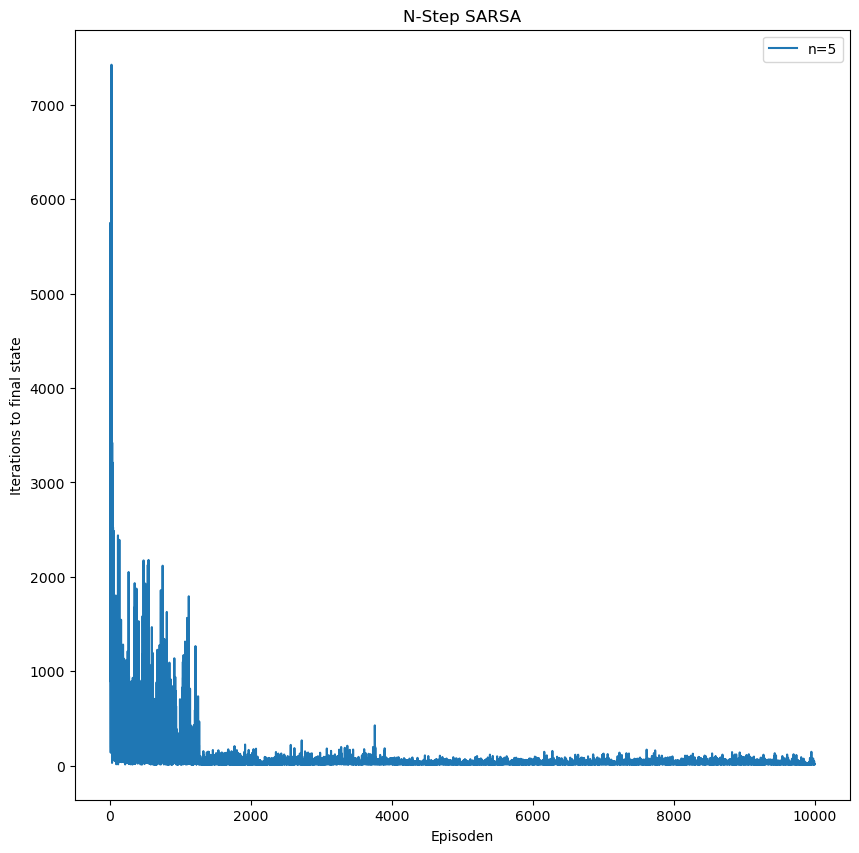

In [14]:
num_episodes = 10000
total_actions = 9
Q = -np.random.rand(num_rows, num_cols, total_actions)
for ending_pos in ending_positions:
    Q[ending_pos[0], ending_pos[1]] = [0,0,0,0,0,0,0,0,0]
    
#print(Q)
#b = 1/total_actions


alpha = 1/100
gamma=0.99
epsilon = 0.1
n=5
Q, episode_lengths=n_step_sarsa(Q, num_episodes, alpha, gamma, epsilon, n)


#show_world(world, starting_positions, ending_positions, Q=Q)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(episode_lengths)
print(f"average of the last 10000 steps: {np.average(episode_lengths[-10000:len(episode_lengths)])}")
print(f"last 10 episode lengths: {episode_lengths[-10:len(episode_lengths)]}")

plt.legend([f'n={n}'])

plt.xlabel('Episoden')
plt.ylabel('Iterations to final state')

# Überschrift hinzufügen
plt.title('N-Step SARSA')

# Speichern der Grafik mit Überschrift
plt.savefig('N_Step_SARSA.png')

plt.show